In [1]:
!pip install roboflow ultralytics

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 688.3 kB/s eta 0:00:00m eta 0:00:0136m0:00:01
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-2.1.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached torch-2.6.0-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-manylinux1_x86_64.whl.me

In [2]:
# Check the type of GPU we're using
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Importing the required libraries
from ultralytics import YOLO
from ultralytics.utils.benchmarks import benchmark
from roboflow import Roboflow
import os
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
Setup complete ✅ (8 CPUs, 15.5 GB RAM, 238.7/467.3 GB disk)

OS                  Linux-6.11.0-21-generic-x86_64-with-glibc2.39
Environment         Linux
Python              3.12.3
Install             pip
Path                /home/daniel-brian/YOLO/yolo/lib/python3.12/site-packages/ultralytics
RAM                 15.47 GB
Disk                238.7/467.3 GB
CPU                 Intel Core(TM) i7-8650U 1.90GHz
CPU count           8
GPU                 None
GPU count           None
CUDA                None

numpy               ✅ 2.1.1<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.1>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.2.1>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.2>=1.4.1
torch               ✅ 2.6.0>=1.8.0
torch               ✅ 2.6.0!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0>=0.9.

In [3]:
# Import the Custom data from roboflow
rf = Roboflow(api_key="YOUR-API-KEY")
project = rf.workspace("yolo-data-test").project("apple-leaves-disease-detection")
version = project.version(1)
dataset = version.download("yolov9")                

loading Roboflow workspace...
loading Roboflow project...


In [10]:
# Train the model using yolov9 with 10 epochs
!yolo task=detect mode=train model=yolov9t.pt data={dataset.location}/data.yaml epochs=10 imgsz=416 workers=2 batch=2 amp=False device=cpu

100%|██████████████████████████████████████| 4.74M/4.74M [00:01<00:00, 3.40MB/s]
Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/data.yaml, epochs=10, time=None, patience=100, batch=2, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=2, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

In [12]:
# Checking the validation
!yolo task=detect mode=val model=/home/daniel-brian/YOLO/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv9t summary (fused): 197 layers, 1,970,979 parameters, 0 gradients, 7.6 GFLOPs
val: Scanning /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        100        905       0.76      0.632      0.759      0.524
Speed: 1.1ms preprocess, 76.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
# Evaluating the prediction
!yolo task=detect mode=predict model=/home/daniel-brian/YOLO/runs/detect/train6/weights/best.pt source={dataset.location}/test/images

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv9t summary (fused): 197 layers, 1,970,979 parameters, 0 gradients, 7.6 GFLOPs

image 1/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE_S-3079_90deg_JPG.rf.6b77ab48da3b66c46a38f38c24e8f9dd.jpg: 416x416 11 affected areas, 111.7ms
image 2/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/09ba6ad9-aa8d-4493-b1bf-818a4b30c4aa___FREC_Scab-2981_new30degFlipLR_JPG.rf.e1313118e71bbdd78238b0856fe9e7d4.jpg: 416x416 10 affected areas, 105.3ms
image 3/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab-2973_90deg_JPG.rf.3e4d3a9b4f300590fbbeb7a7d3a70758.jpg: 416x416 9 affected areas, 125.4ms
image 4/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0ce497e6-8184-4ef6-9a9f-c46b66c898c3___RS_HL-6036_JPG.rf.3237f59310e9718

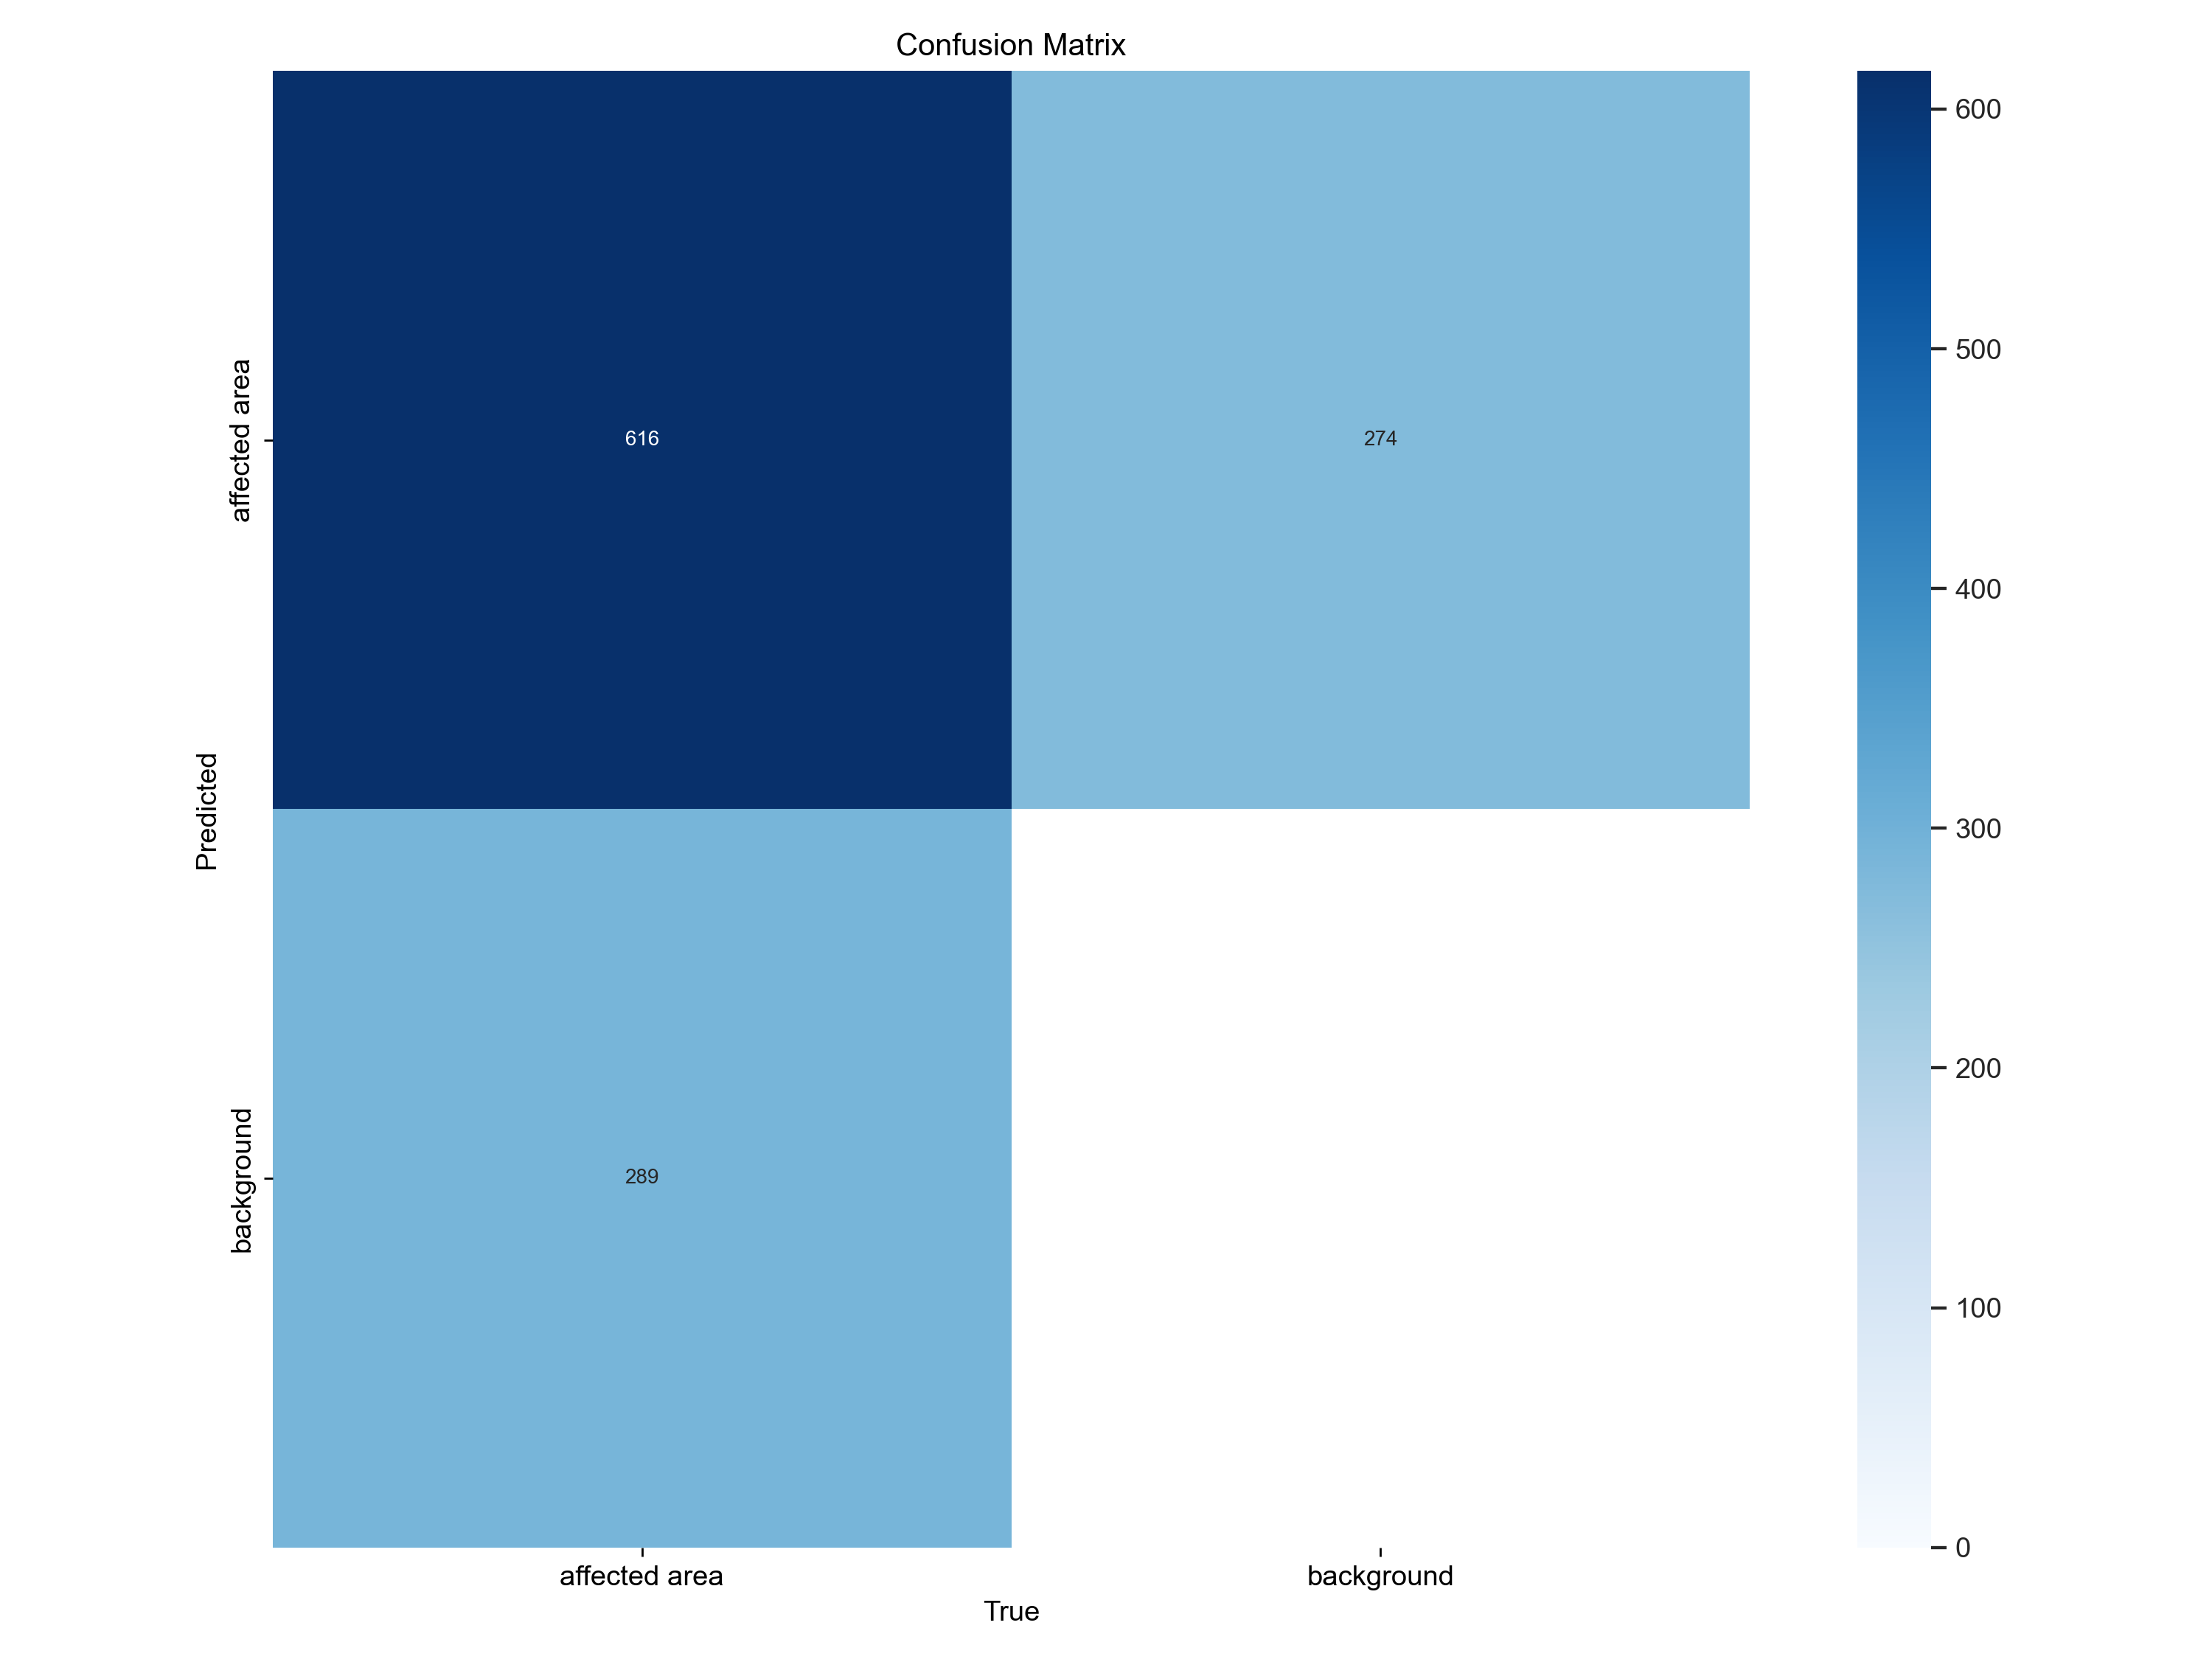

In [12]:
# Confusion Matrix
Image(filename=f'/home/daniel-brian/YOLO/runs/detect/train6/confusion_matrix.png',width=900)

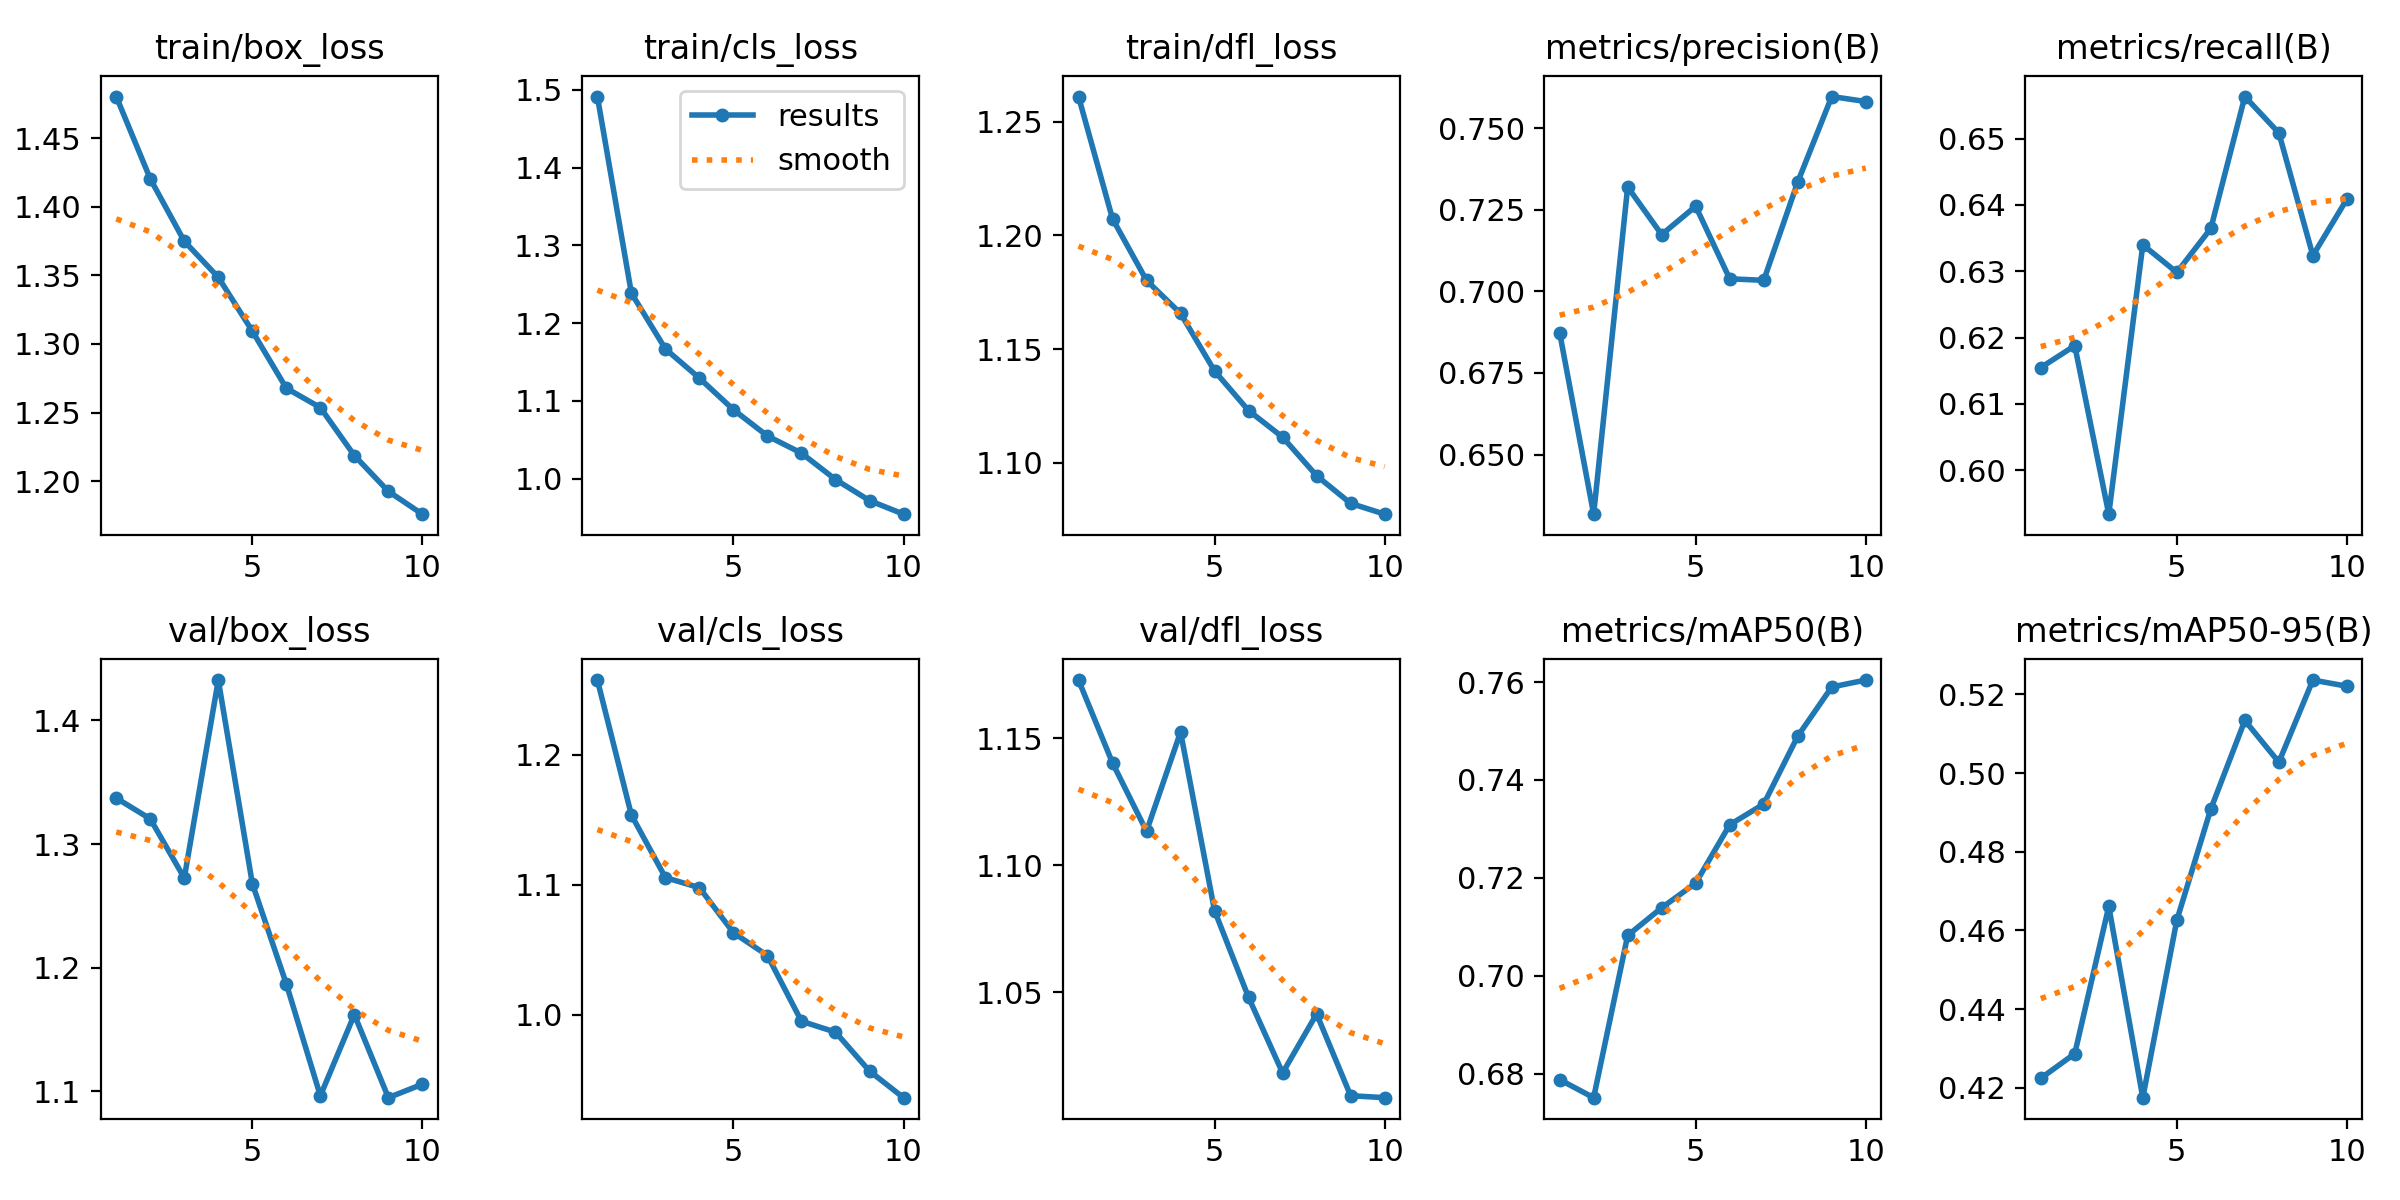

In [16]:
# Training metrics
Image(filename=f'/home/daniel-brian/YOLO/runs/detect/train6/results.png',width=800)

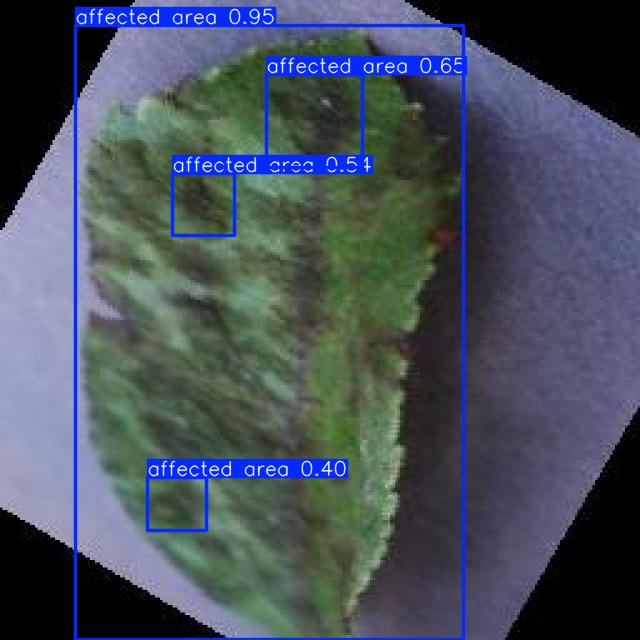

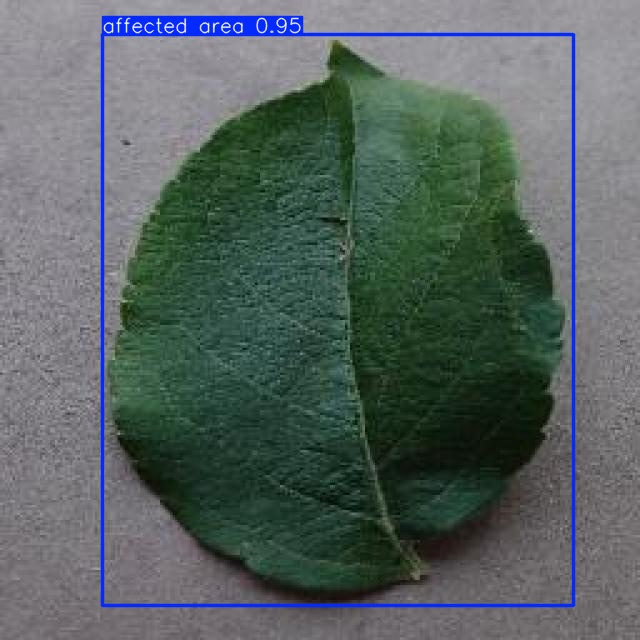

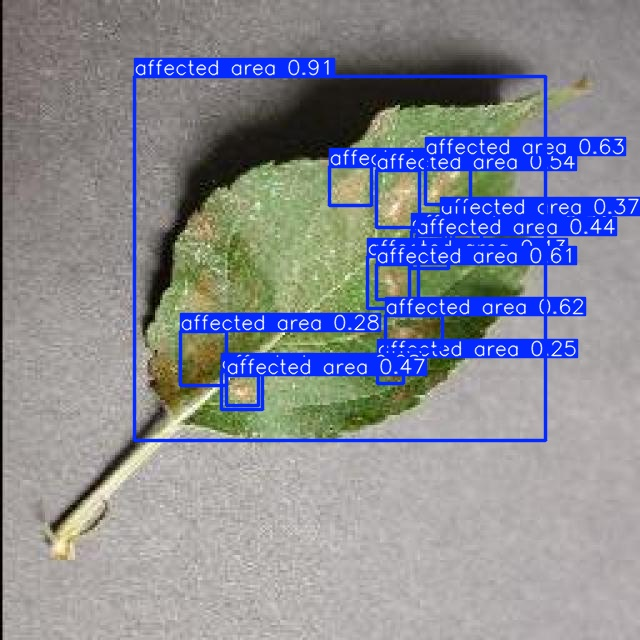

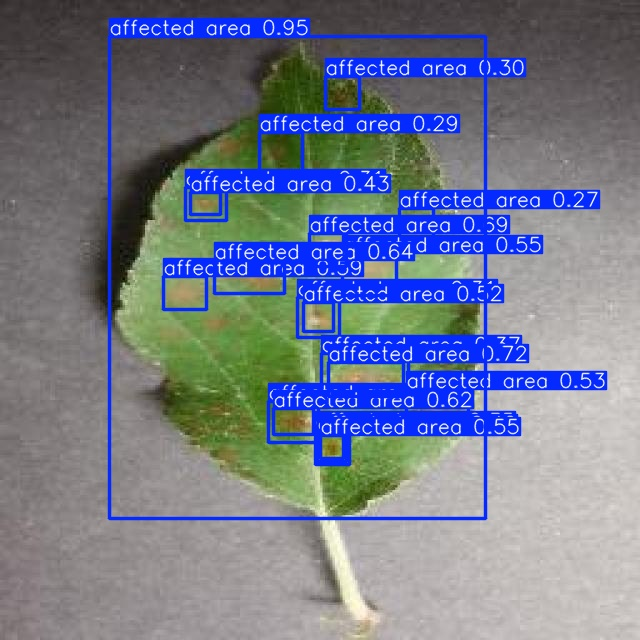

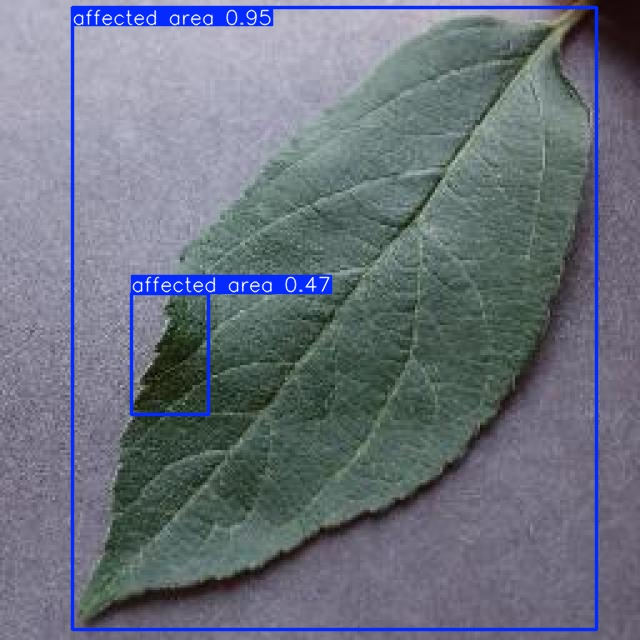

In [21]:
# Displaying the results
import glob
from IPython.display import display, Image
for image_path in glob.glob('/home/daniel-brian/YOLO/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [4]:
# Train the model using 20 epochs to check whether it will improve the accuracy
!yolo task=detect mode=train model=yolov9t.pt data={dataset.location}/data.yaml epochs=20 imgsz=416 workers=2 batch=2 amp=False device=cpu

New https://pypi.org/project/ultralytics/8.3.109 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/data.yaml, epochs=20, time=None, patience=100, batch=2, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=2, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

In [5]:
# Checking the validation of the model while using 20 epochs
!yolo task=detect mode=val model=/home/daniel-brian/YOLO/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv9t summary (fused): 197 layers, 1,970,979 parameters, 0 gradients, 7.6 GFLOPs
val: Scanning /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        100        905      0.755       0.67       0.78      0.547
Speed: 0.9ms preprocess, 49.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [6]:
# Evaluating the prediction of the model 
!yolo task=detect mode=predict model=/home/daniel-brian/YOLO/runs/detect/train8/weights/best.pt source={dataset.location}/test/images

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv9t summary (fused): 197 layers, 1,970,979 parameters, 0 gradients, 7.6 GFLOPs

image 1/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE_S-3079_90deg_JPG.rf.6b77ab48da3b66c46a38f38c24e8f9dd.jpg: 416x416 9 affected areas, 78.0ms
image 2/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/09ba6ad9-aa8d-4493-b1bf-818a4b30c4aa___FREC_Scab-2981_new30degFlipLR_JPG.rf.e1313118e71bbdd78238b0856fe9e7d4.jpg: 416x416 9 affected areas, 60.1ms
image 3/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab-2973_90deg_JPG.rf.3e4d3a9b4f300590fbbeb7a7d3a70758.jpg: 416x416 8 affected areas, 50.9ms
image 4/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0ce497e6-8184-4ef6-9a9f-c46b66c898c3___RS_HL-6036_JPG.rf.3237f59310e971892a92

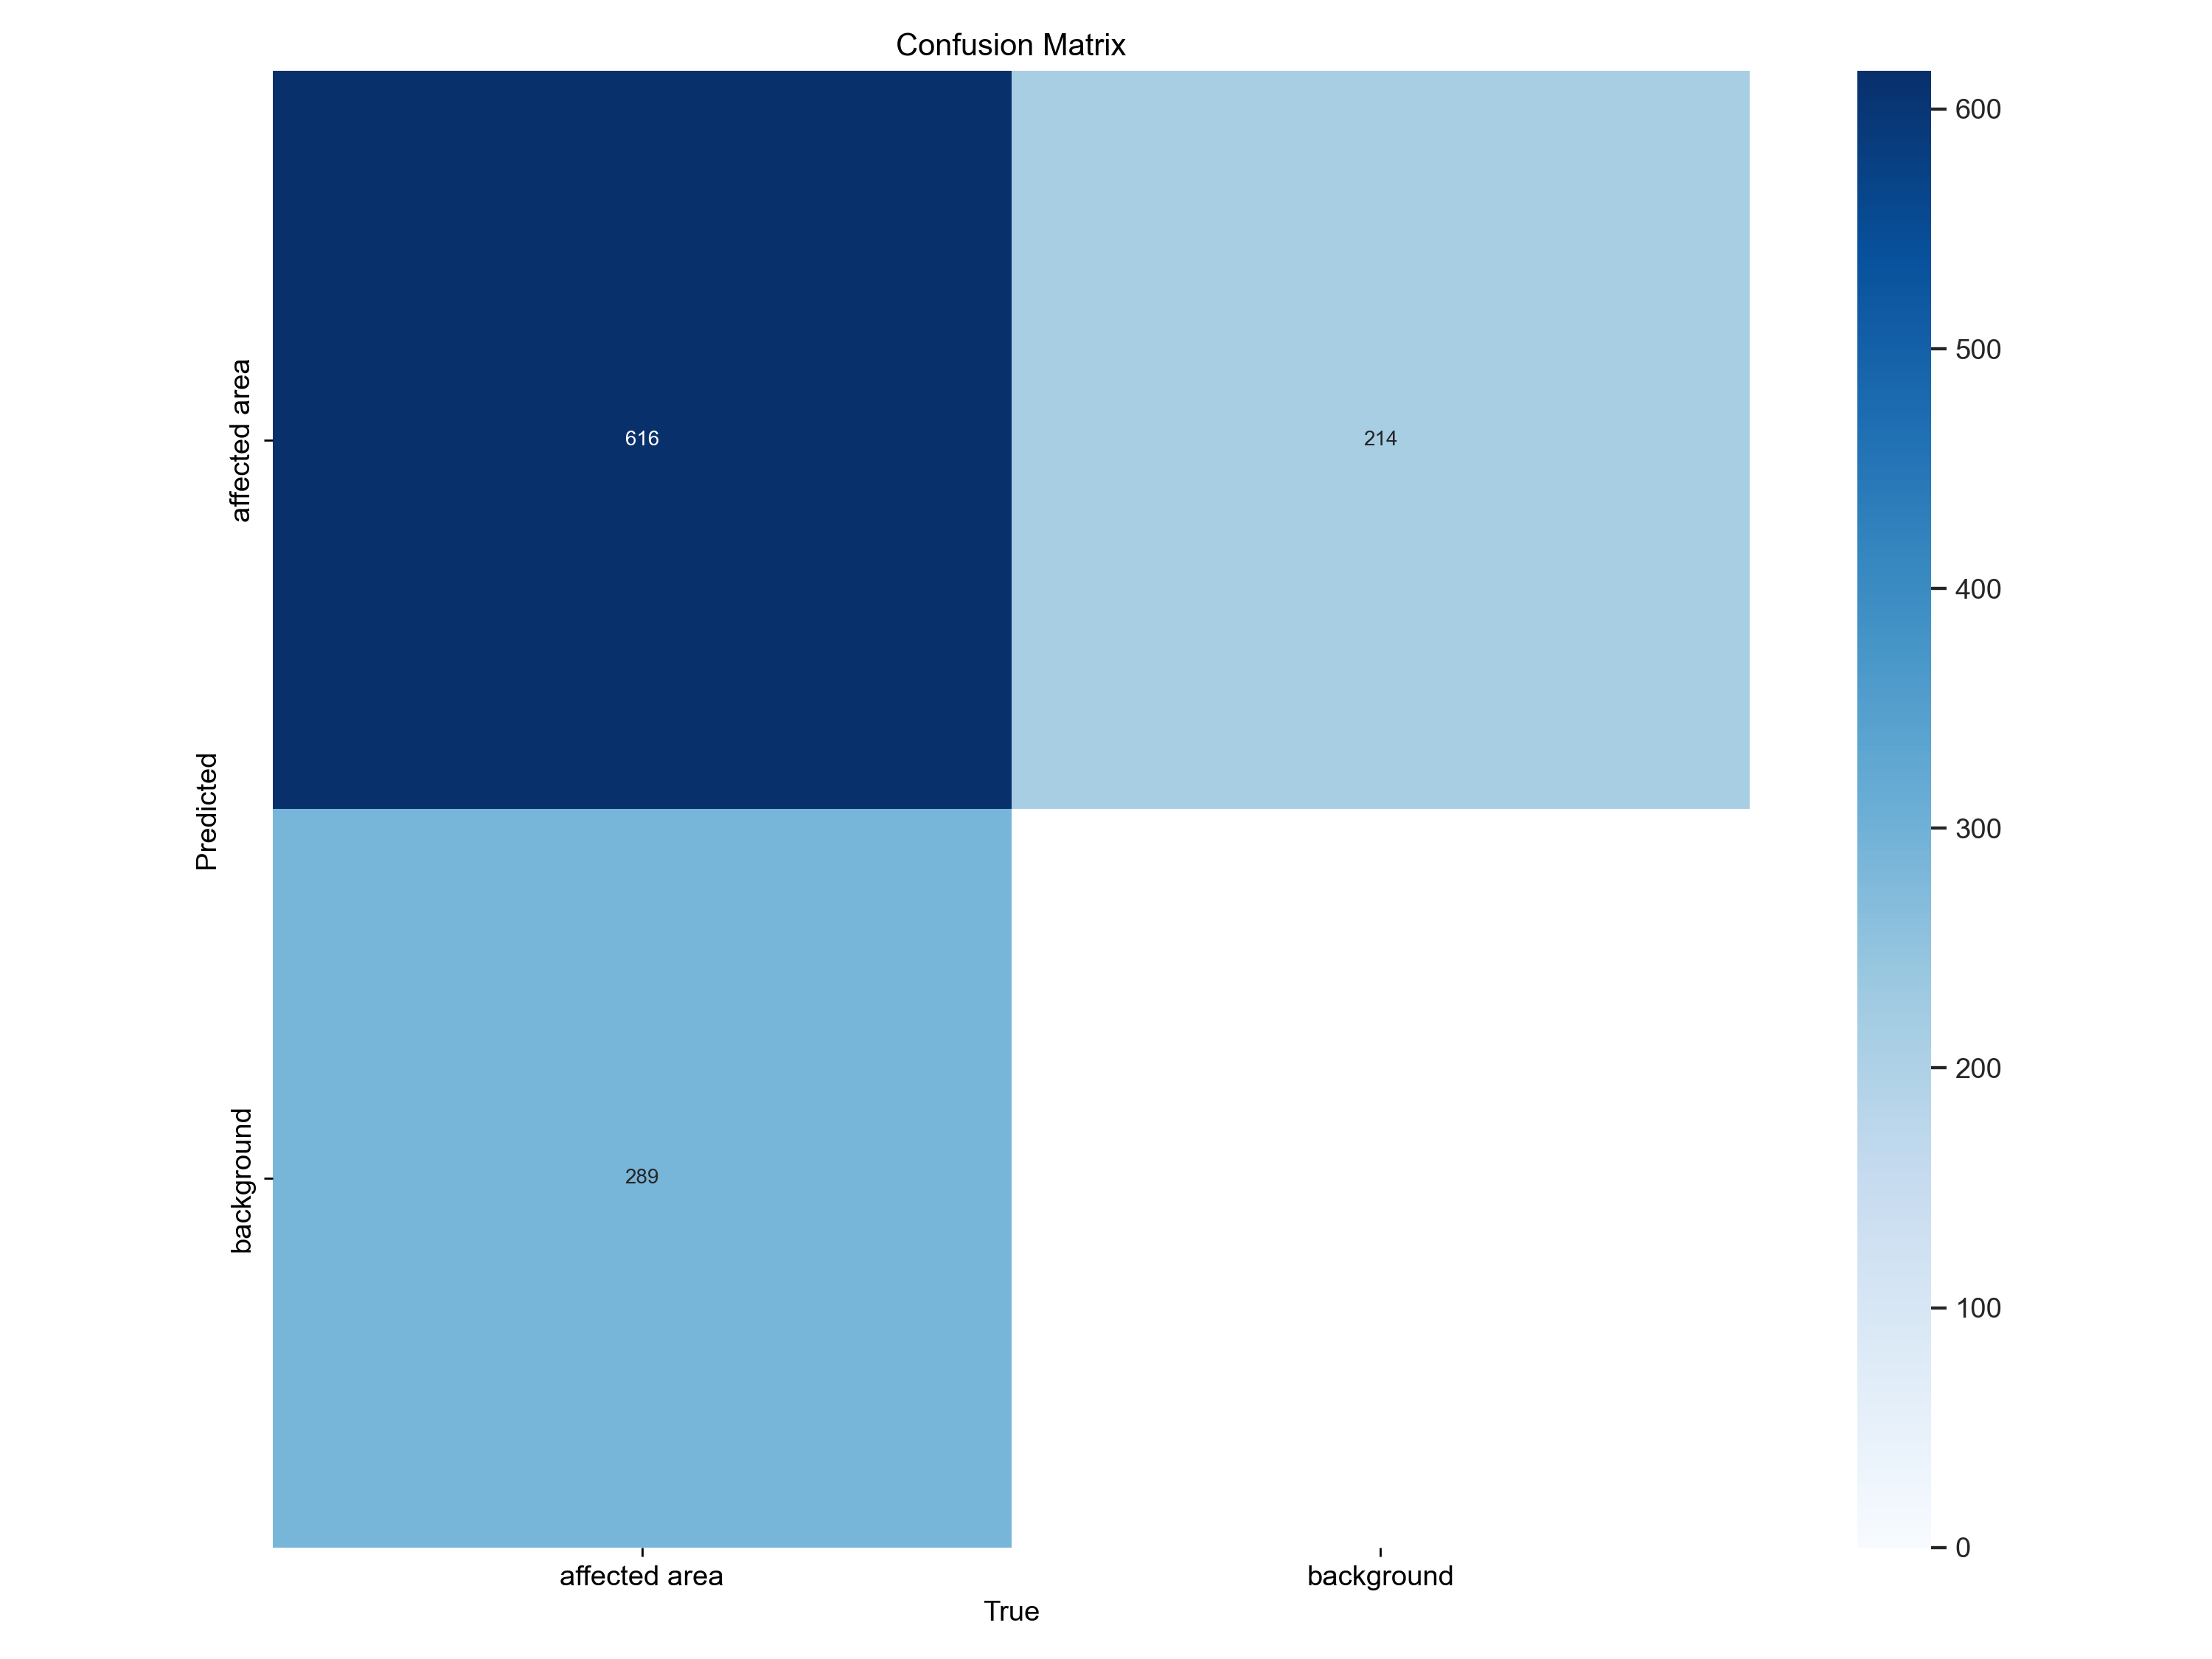

In [13]:
# Confusion Matrix
from IPython.display import display, Image
Image(filename=f'/home/daniel-brian/YOLO/runs/detect/train8/confusion_matrix.png',width=900)

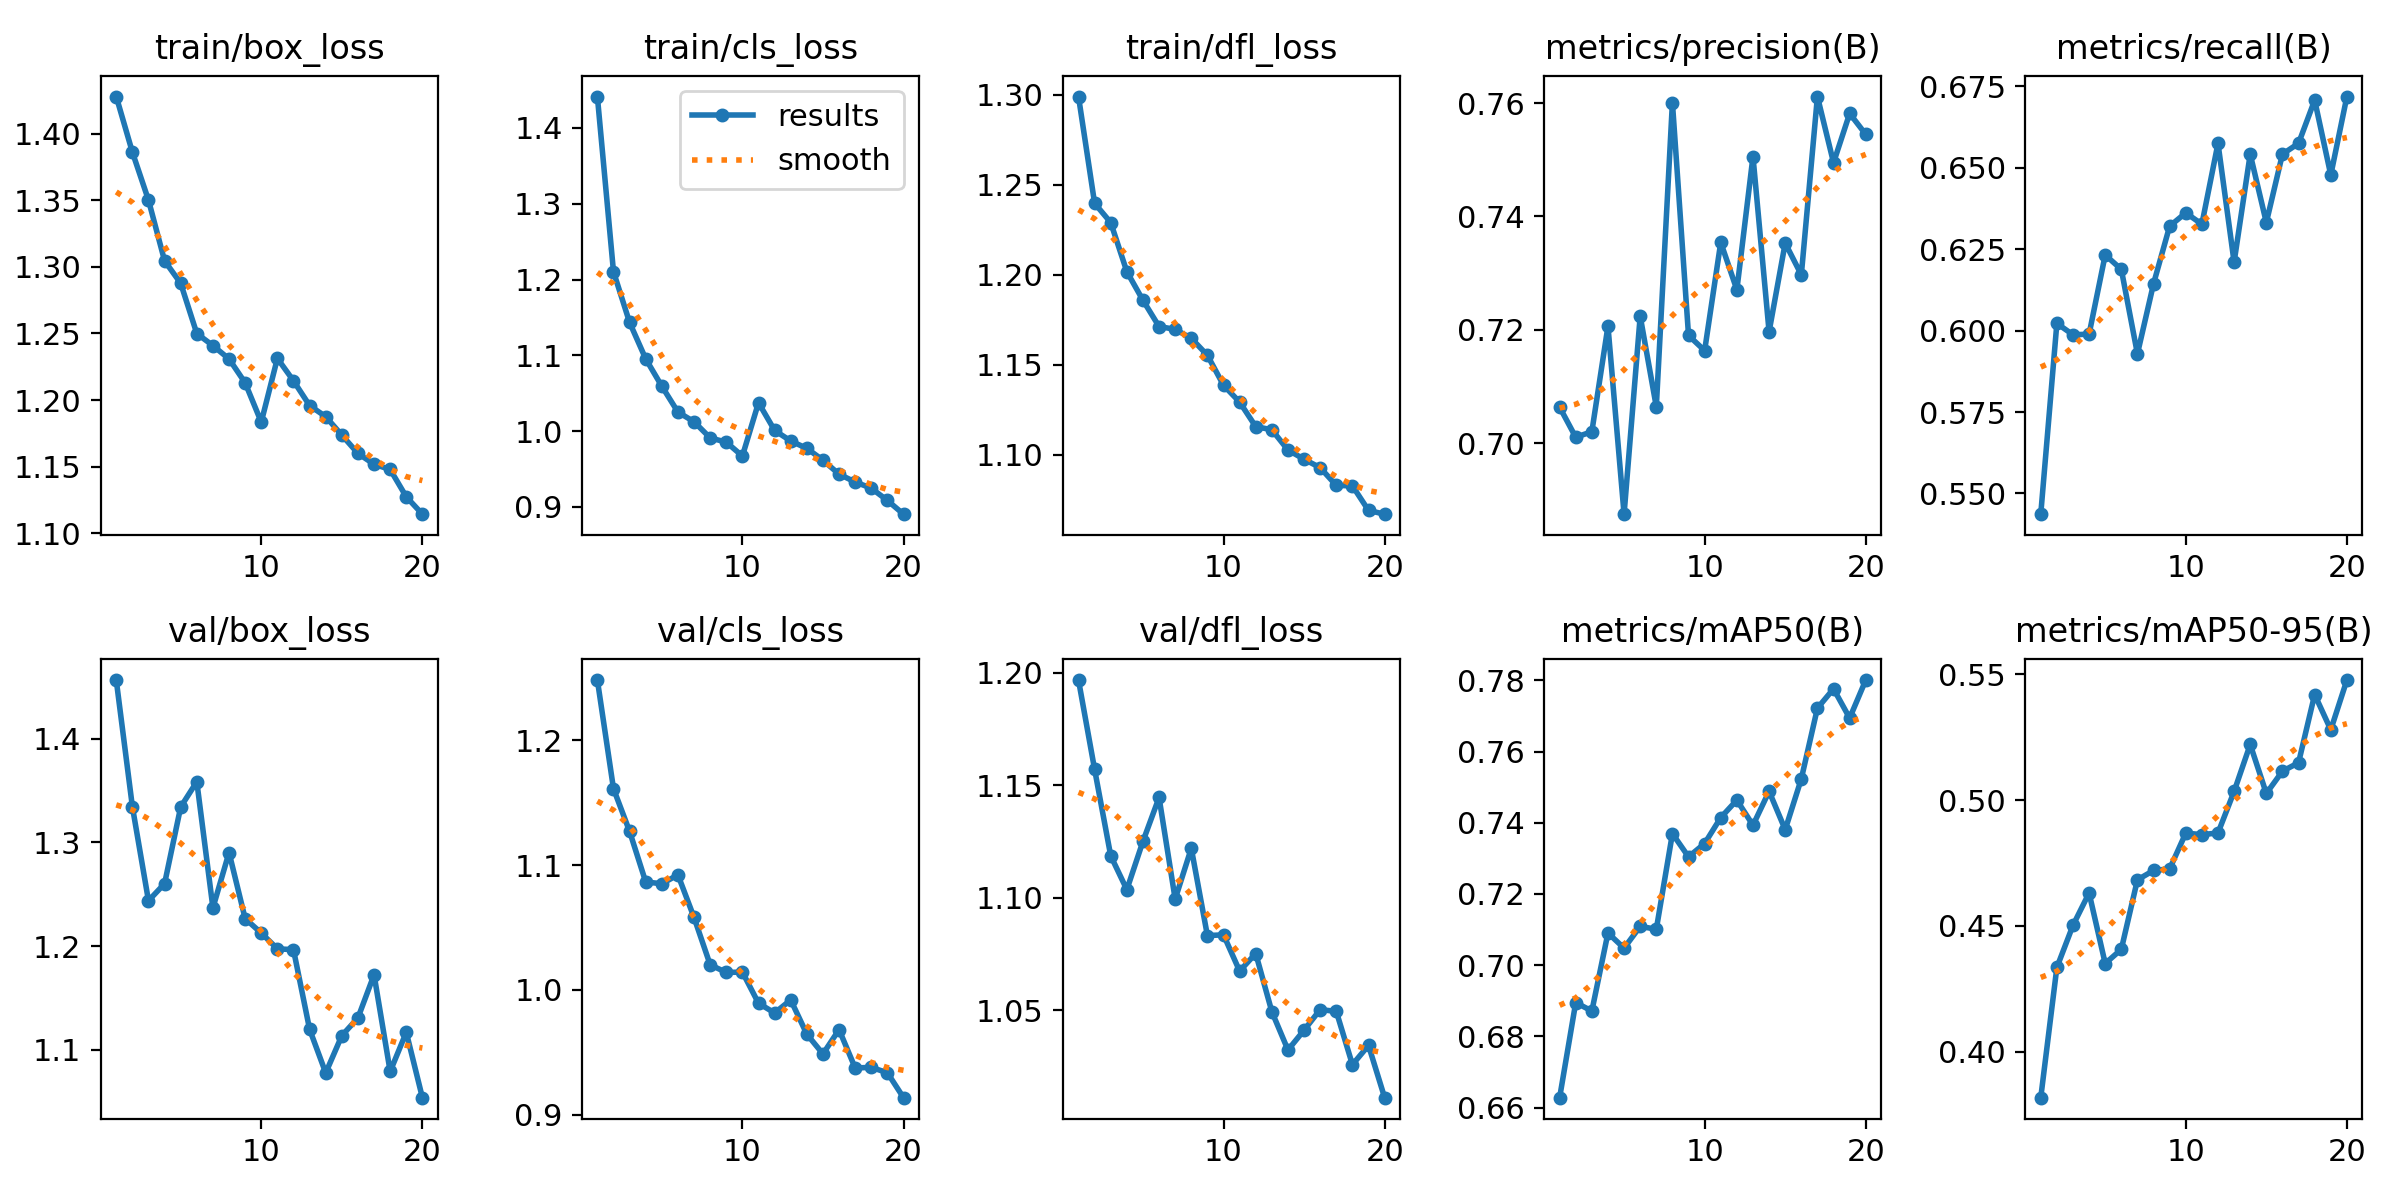

In [11]:
# Training metrics
Image(filename=f'/home/daniel-brian/YOLO/runs/detect/train8/results.png',width=800)

In [10]:
# Train the model using 20 epochs to check whether it will improve the accuracy
!yolo task=detect mode=train model=yolov9s.pt data={dataset.location}/data.yaml epochs=20 imgsz=416 workers=2 batch=2 amp=False device=cpu

New https://pypi.org/project/ultralytics/8.3.112 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/data.yaml, epochs=20, time=None, patience=100, batch=2, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=2, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

In [11]:
# Checking the validation of the model
!yolo task=detect mode=val data ={dataset.location}/data.yaml model=/home/daniel-brian/YOLO/runs/detect/train11/weights/best.pt 

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
val: Scanning /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        100        905      0.783      0.642       0.78      0.549
Speed: 4.5ms preprocess, 659.2ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
# Evaluating the model performance
!yolo task=detect mode=predict model=/home/daniel-brian/YOLO/runs/detect/train11/weights/best.pt source={dataset.location}/test/images

Ultralytics 8.3.108 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs

image 1/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE_S-3079_90deg_JPG.rf.6b77ab48da3b66c46a38f38c24e8f9dd.jpg: 416x416 8 affected areas, 841.6ms
image 2/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/09ba6ad9-aa8d-4493-b1bf-818a4b30c4aa___FREC_Scab-2981_new30degFlipLR_JPG.rf.e1313118e71bbdd78238b0856fe9e7d4.jpg: 416x416 11 affected areas, 2393.4ms
image 3/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab-2973_90deg_JPG.rf.3e4d3a9b4f300590fbbeb7a7d3a70758.jpg: 416x416 12 affected areas, 775.6ms
image 4/100 /home/daniel-brian/YOLO/Apple-Leaves-Disease-Detection-1/test/images/0ce497e6-8184-4ef6-9a9f-c46b66c898c3___RS_HL-6036_JPG.rf.3237f59310e97

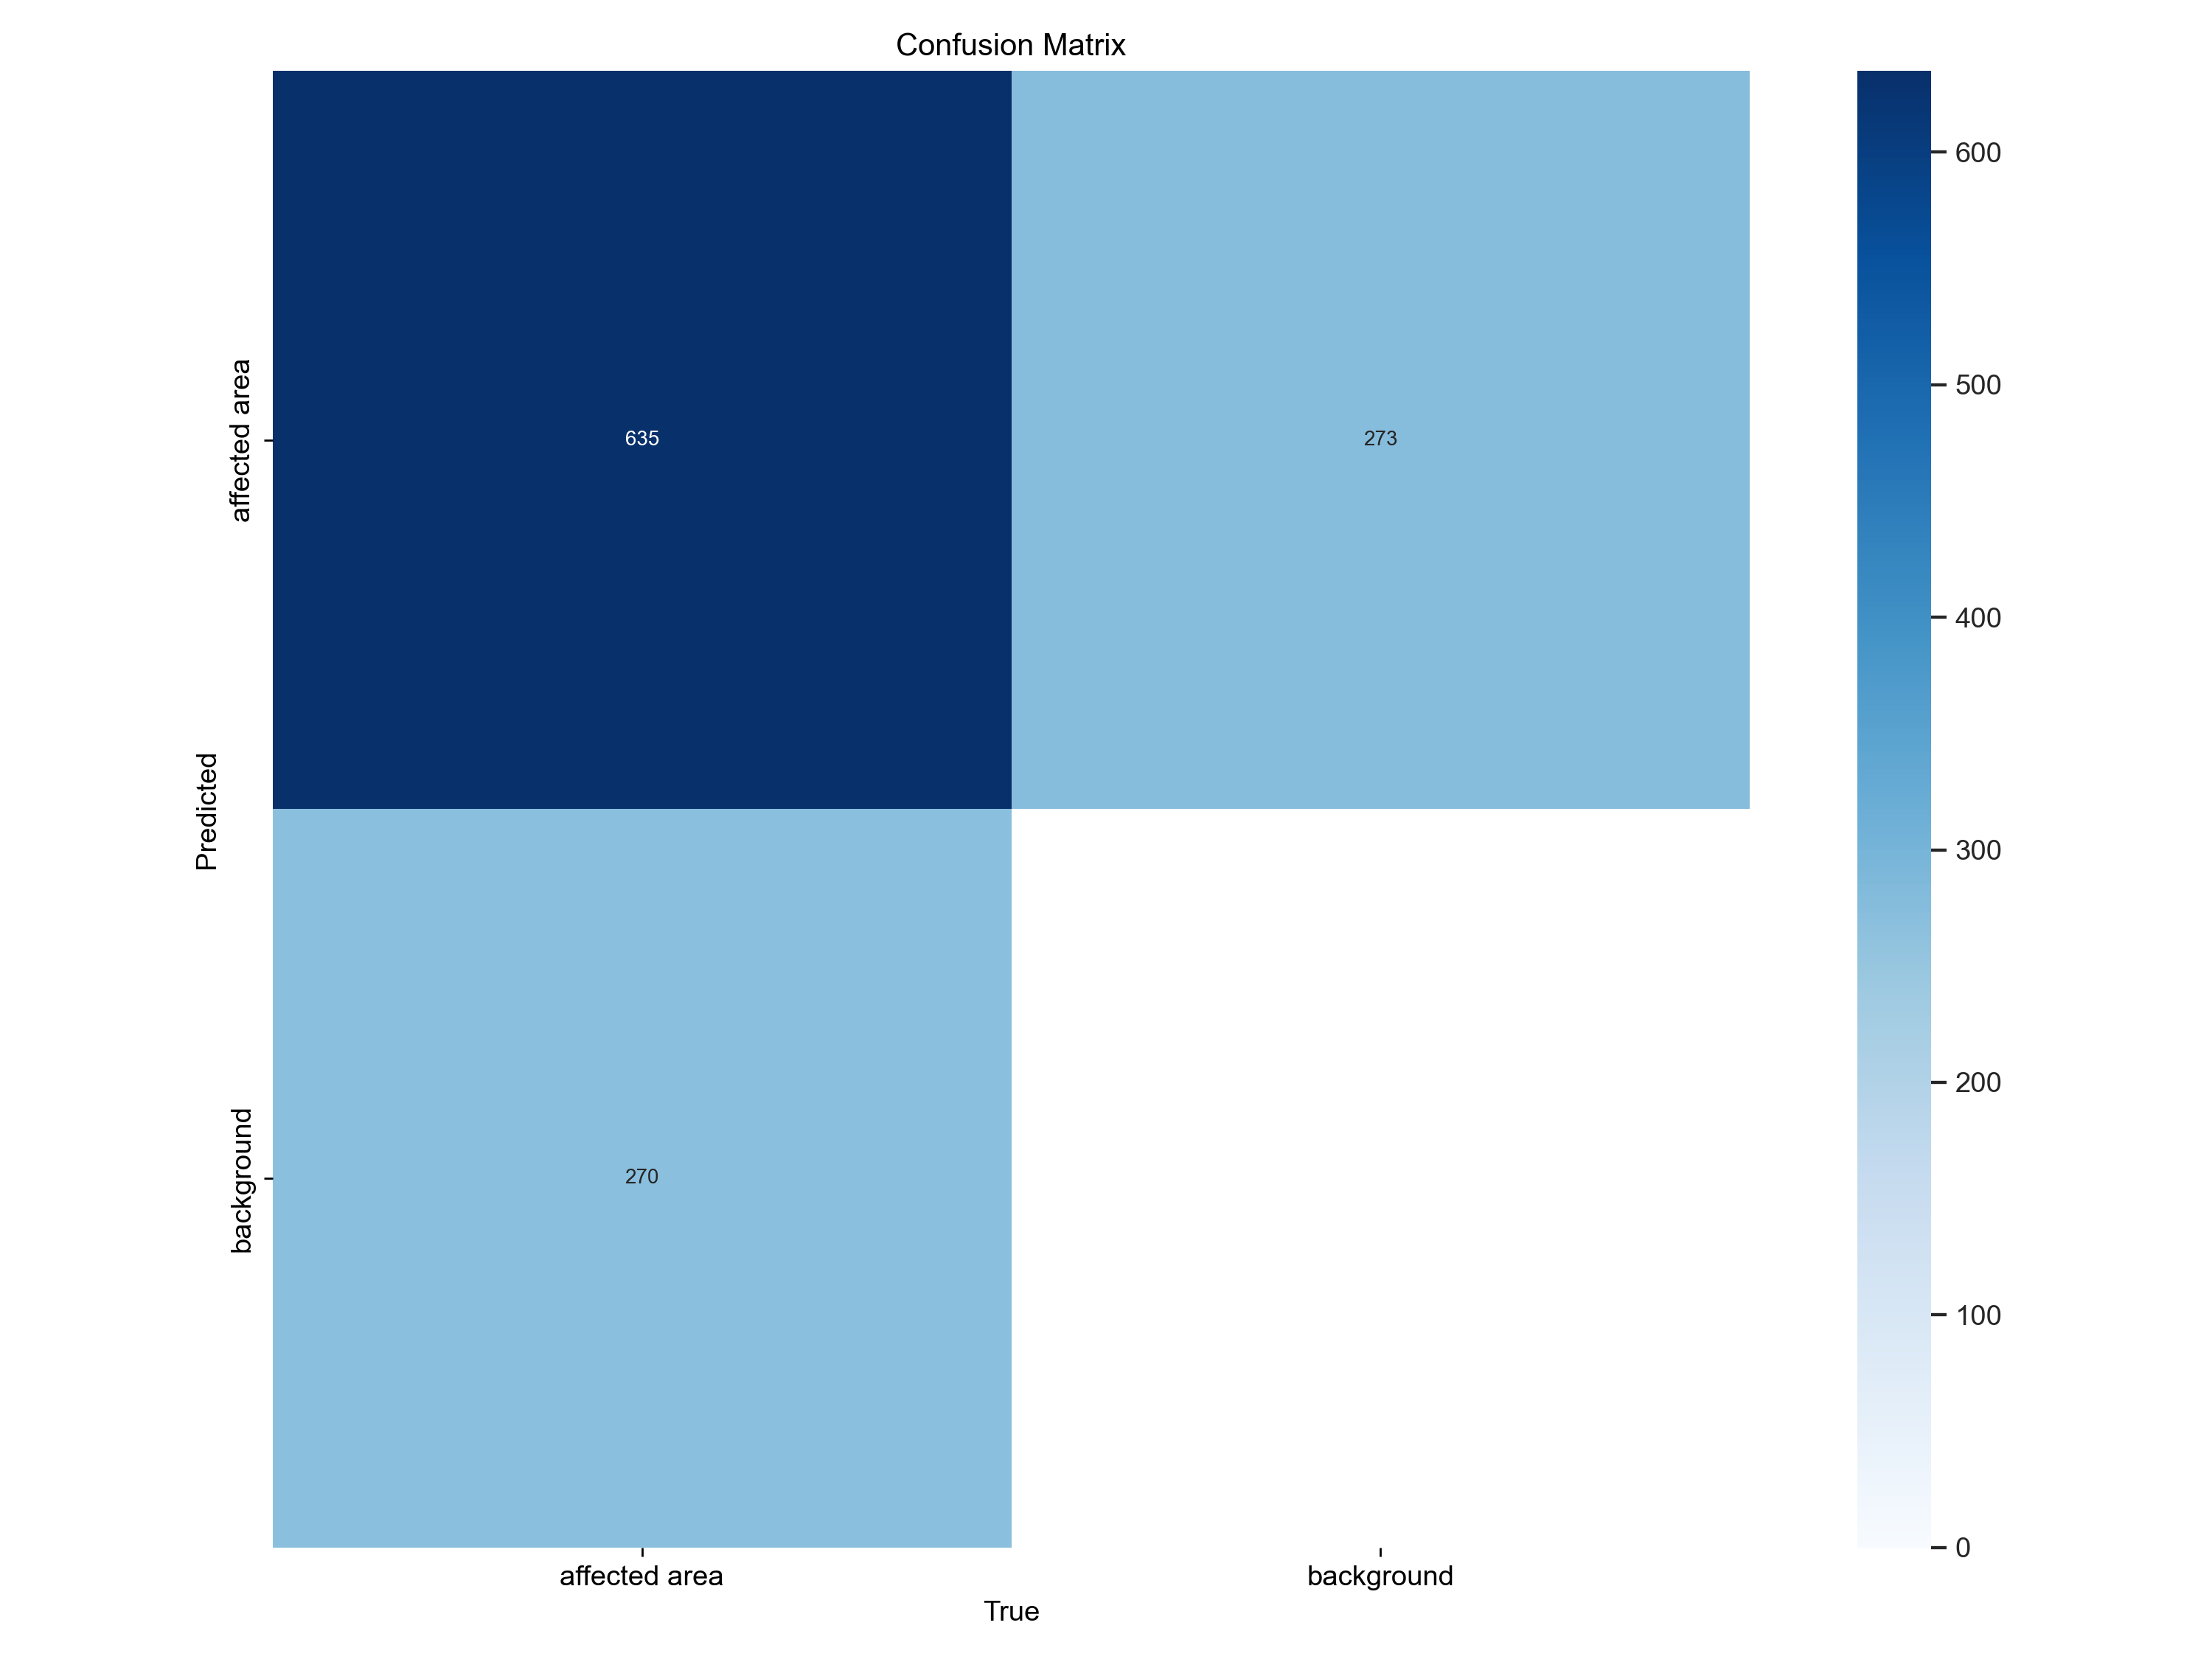

In [16]:
# Confusion Matrix for the YOLOv9s.pt for validation
from IPython.display import display, Image
Image(filename=f"/home/daniel-brian/YOLO/runs/detect/val3/confusion_matrix.png",width=900)

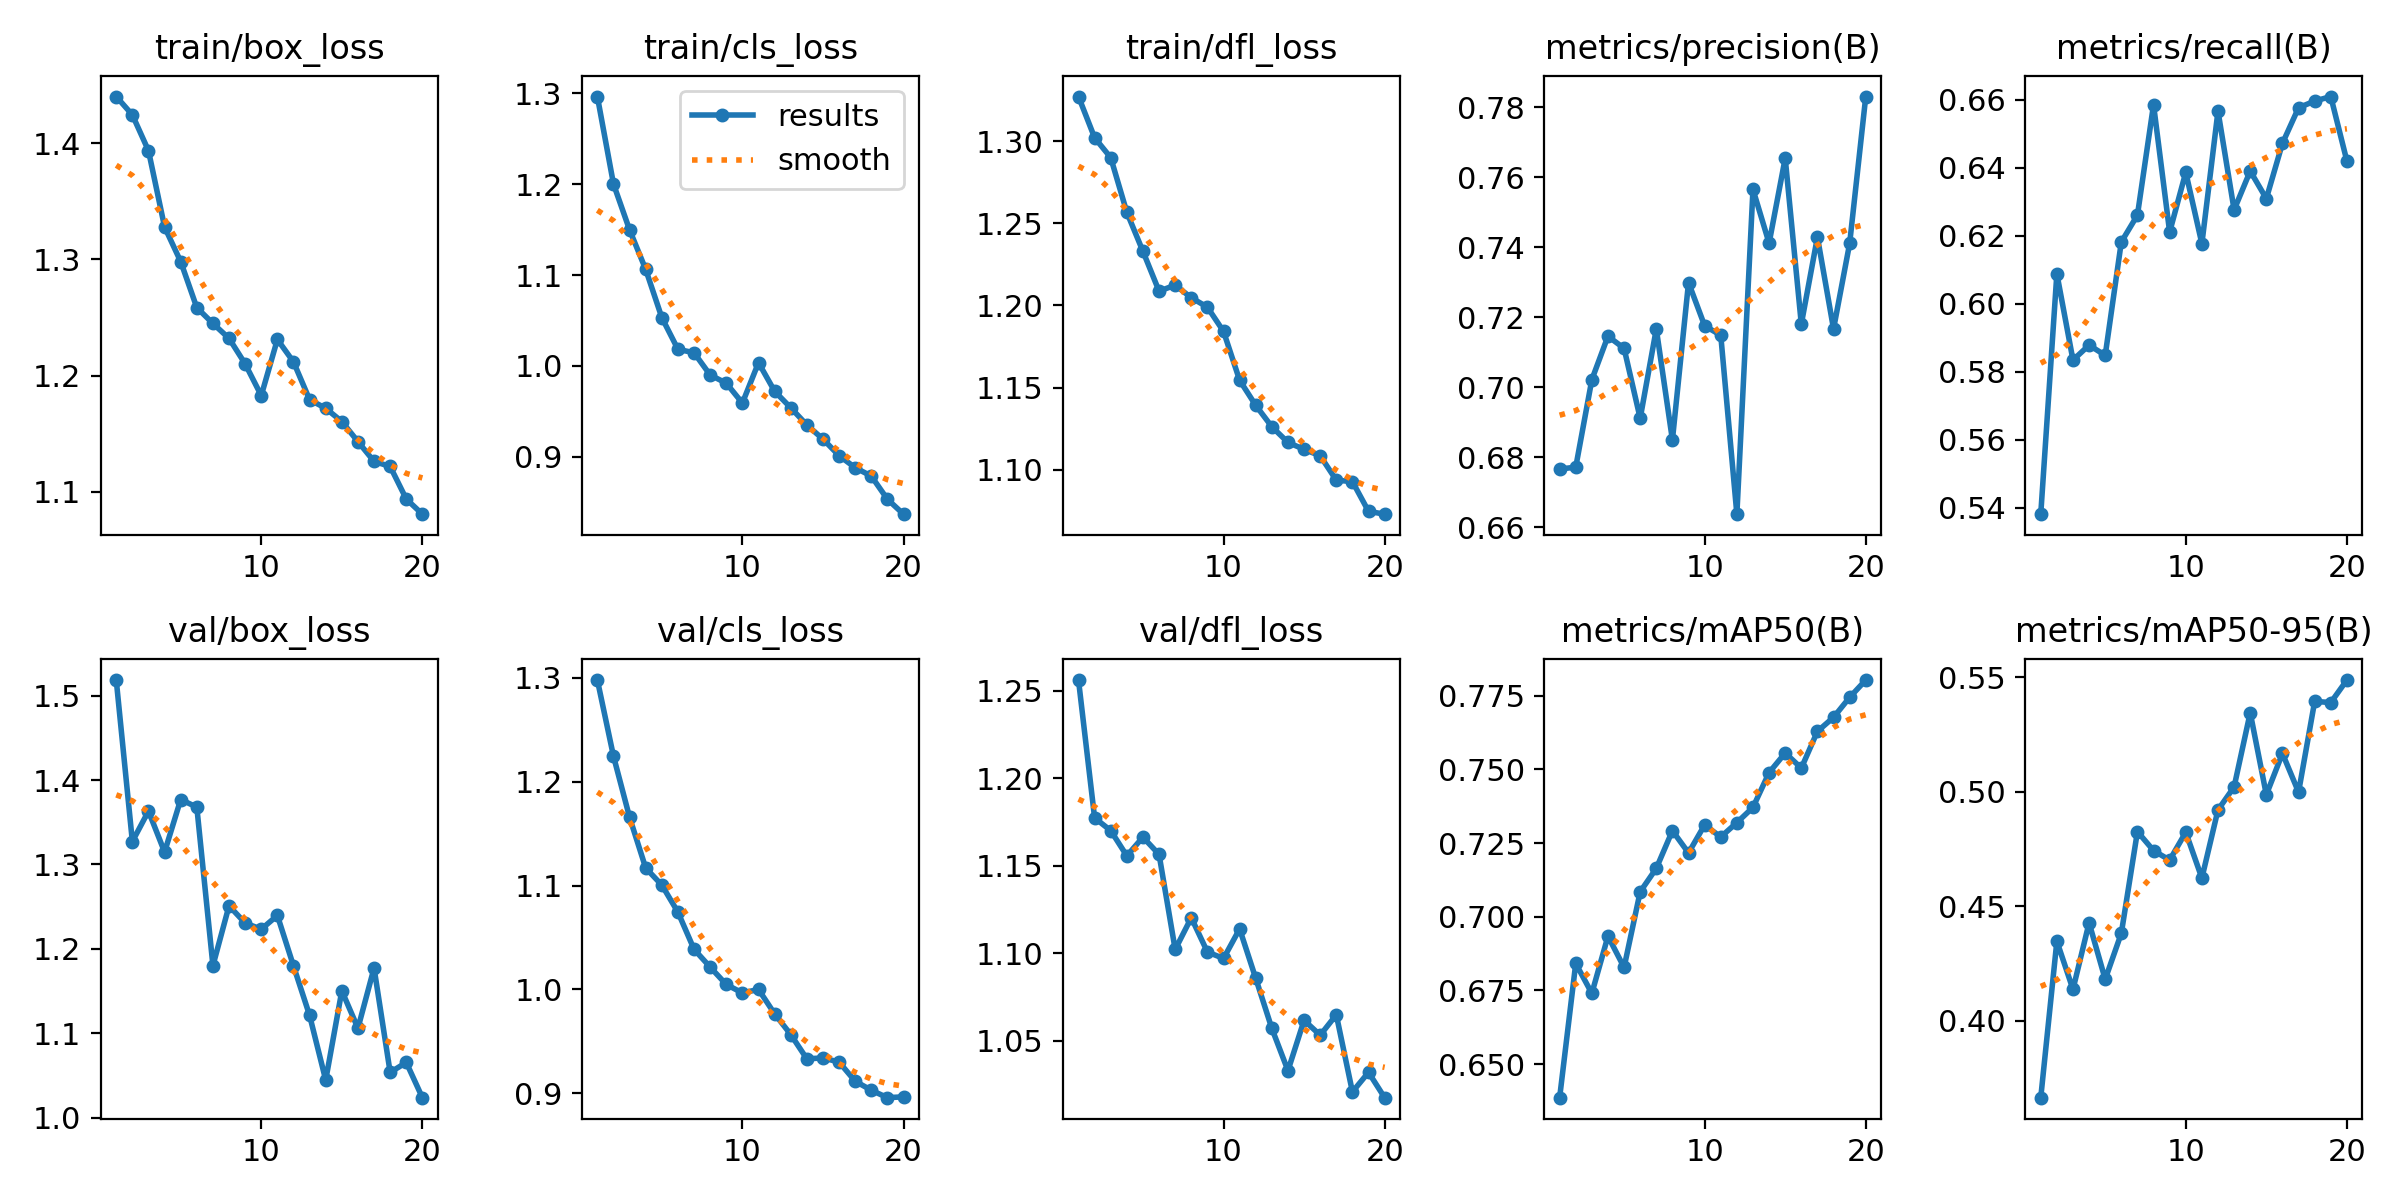

In [19]:
# Training metrics
Image(filename=f"/home/daniel-brian/YOLO/runs/detect/train11/results.png",width=900)

In [1]:
# Benchmarking yolov9pt the model
!yolo benchmark model=yolov9t.pt data={dataset.location}/data.yaml imgsz=416 half=False device=cpu

# Benchmark specific export format
!yolo export model=yolov9t.pt.pt data={dataset.location}/data.yaml imgsz=416 format=onnx

In [ ]:
# Benchmarking yolov9s.pt
!yolo benchmark model=yolov9s.pt data={dataset.location}/data.yaml imgsz=416 device=cpu

# Benchmark onnx format
!yolo export model=yolov9s.pt data={dataset.location}/data.yaml imgsz=416  device=cpu